In [3]:
from netCDF4 import Dataset, num2date
import numpy as np
import pandas as pd
import xarray as xr
import os
import time
import matplotlib.pyplot as plt
import matplotlib
import gc
from matplotlib import transforms
import matplotlib.colors as clrs
import glob

In [4]:
for i in np.arange(0,12):
    filename = "/gpfs/fs7/dfo/hpcmc/comda/stod000/DATA/WOD/NO3/nitrate_wod_monthly_"+str(i+1)+"_CREG025.nc"
    data = Dataset(filename, "r", format="NETCDF4")
    X = data.variables['Nitrate'][:]
    if i==0:
        [nz,ny,nx]=np.shape(X)
        obs=np.zeros((12,nz,ny,nx))
        obsNO3=np.transpose(obs,(0,3,1,2))
        print(np.shape(obsNO3))
        #[nz,ny,nx]=np.shape(X)
        [nt,nz,ny,nx] = np.shape(obsNO3)
    obsNO3[i,:,:,:]=np.transpose(X,(2,0,1))

print(type(obsNO3))
print(np.shape(obsNO3))
print(np.nanmin(obsNO3), np.nanmax(obsNO3), np.nanmean(obsNO3))

/tmp/ipykernel_78461/2502604247.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = data.variables['Nitrate'][:]


(12, 75, 735, 528)
<class 'numpy.ndarray'>
(12, 75, 735, 528)
0.0009756098152138293 1453.6586100260417 12.551335043473813


In [5]:
data_file = Dataset("/gpfs/fs7/dfo/hpcmc/comda/stod000/CREG25/regions_mask_6.nc", "r", format="NETCDF4")
regindx = (data_file['regions_mask'][:])
print(regindx.shape)

data_file = Dataset("/home/fid000/WORK7/ANALYSIS/DATA/CREG025_mesh_mask.nc", "r", format="NETCDF4")
tmask = (data_file['tmask'][0,:,:,:])
print(tmask.shape)

print(np.nanmin(regindx),np.nanmean(regindx),np.nanmax(regindx))
print(np.min(tmask),np.mean(tmask),np.max(tmask))

tmask0=tmask[0,:,:].squeeze()

nxy=np.size(regindx)
I = np.reshape(regindx, (nxy,))
nreg=int(max(I))
mask = regindx
mask = mask.flatten()

/tmp/ipykernel_78461/2096643997.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  regindx = (data_file['regions_mask'][:])
/tmp/ipykernel_78461/2096643997.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tmask = (data_file['tmask'][0,:,:,:])


(735, 528)
(75, 735, 528)
0.0 2.0095472683383417 9.0
0 0.3011297327011613 1


Below code is to make Book Surface NO3 WOD Plots

/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. 

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. 

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. 

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. 

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. 

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. 

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. 

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. 

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. 

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016c_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


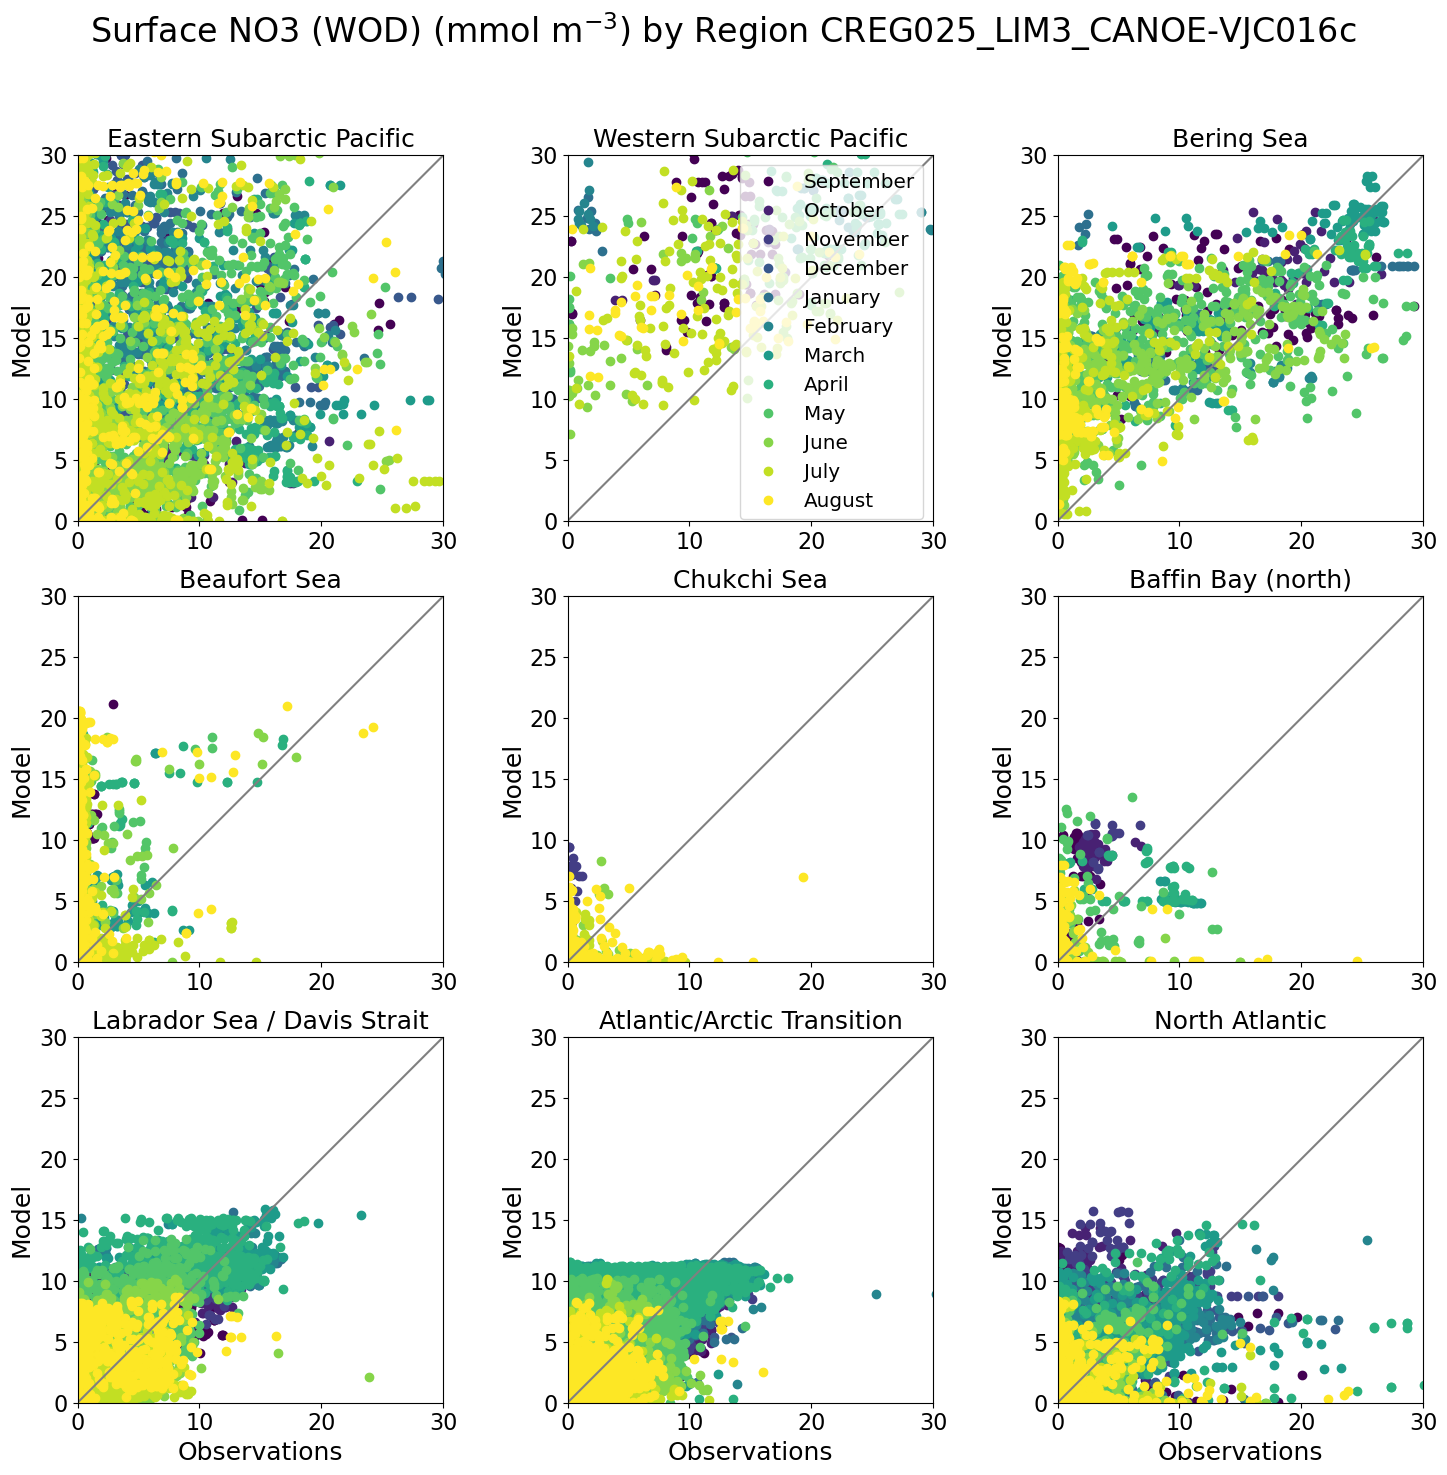

/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. 

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. 

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. 

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. 

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. 

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. 

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. 

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. 

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. 

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016d_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


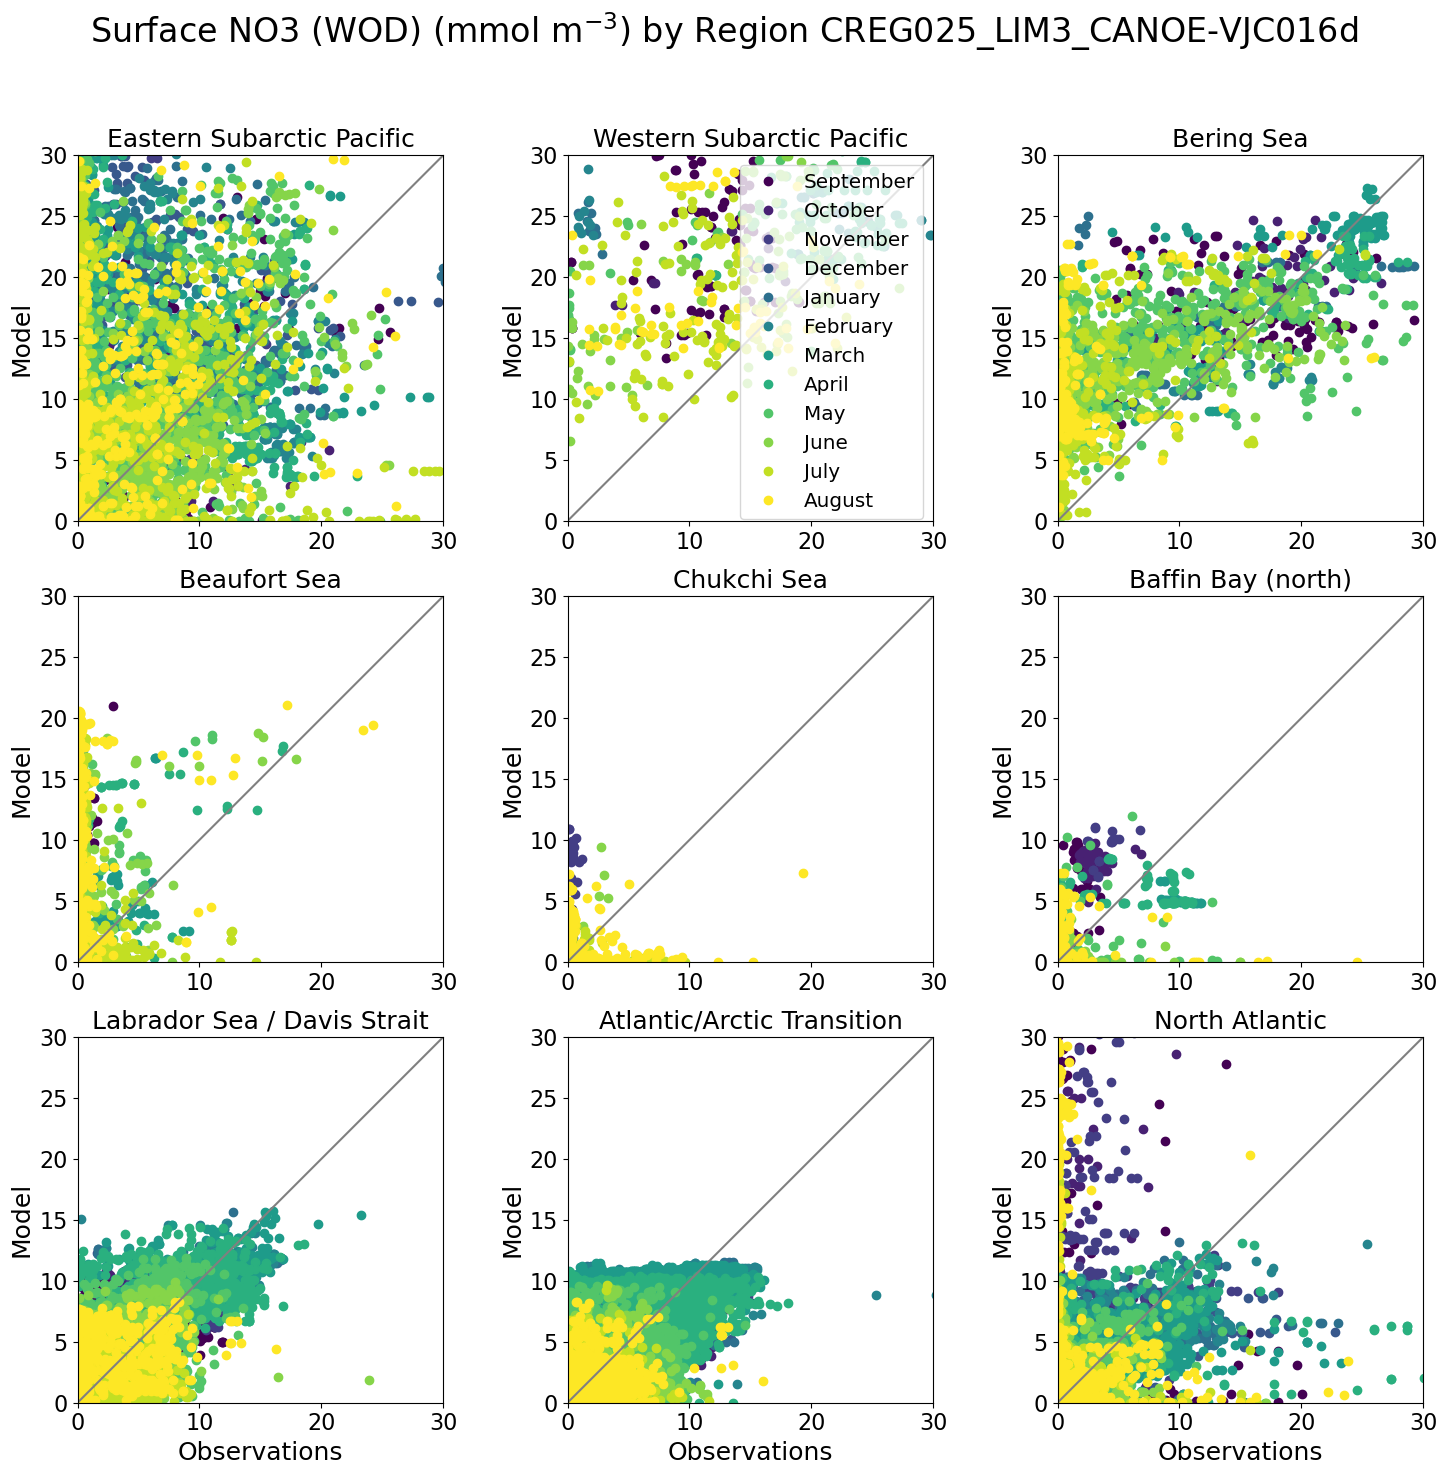

/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. 

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. 

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. 

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. 

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. 

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. 

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. 

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. 

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]
/tmp/ipykernel_78461/892004235.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. 

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC016e_monthly_NO3.nc


/tmp/ipykernel_78461/892004235.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


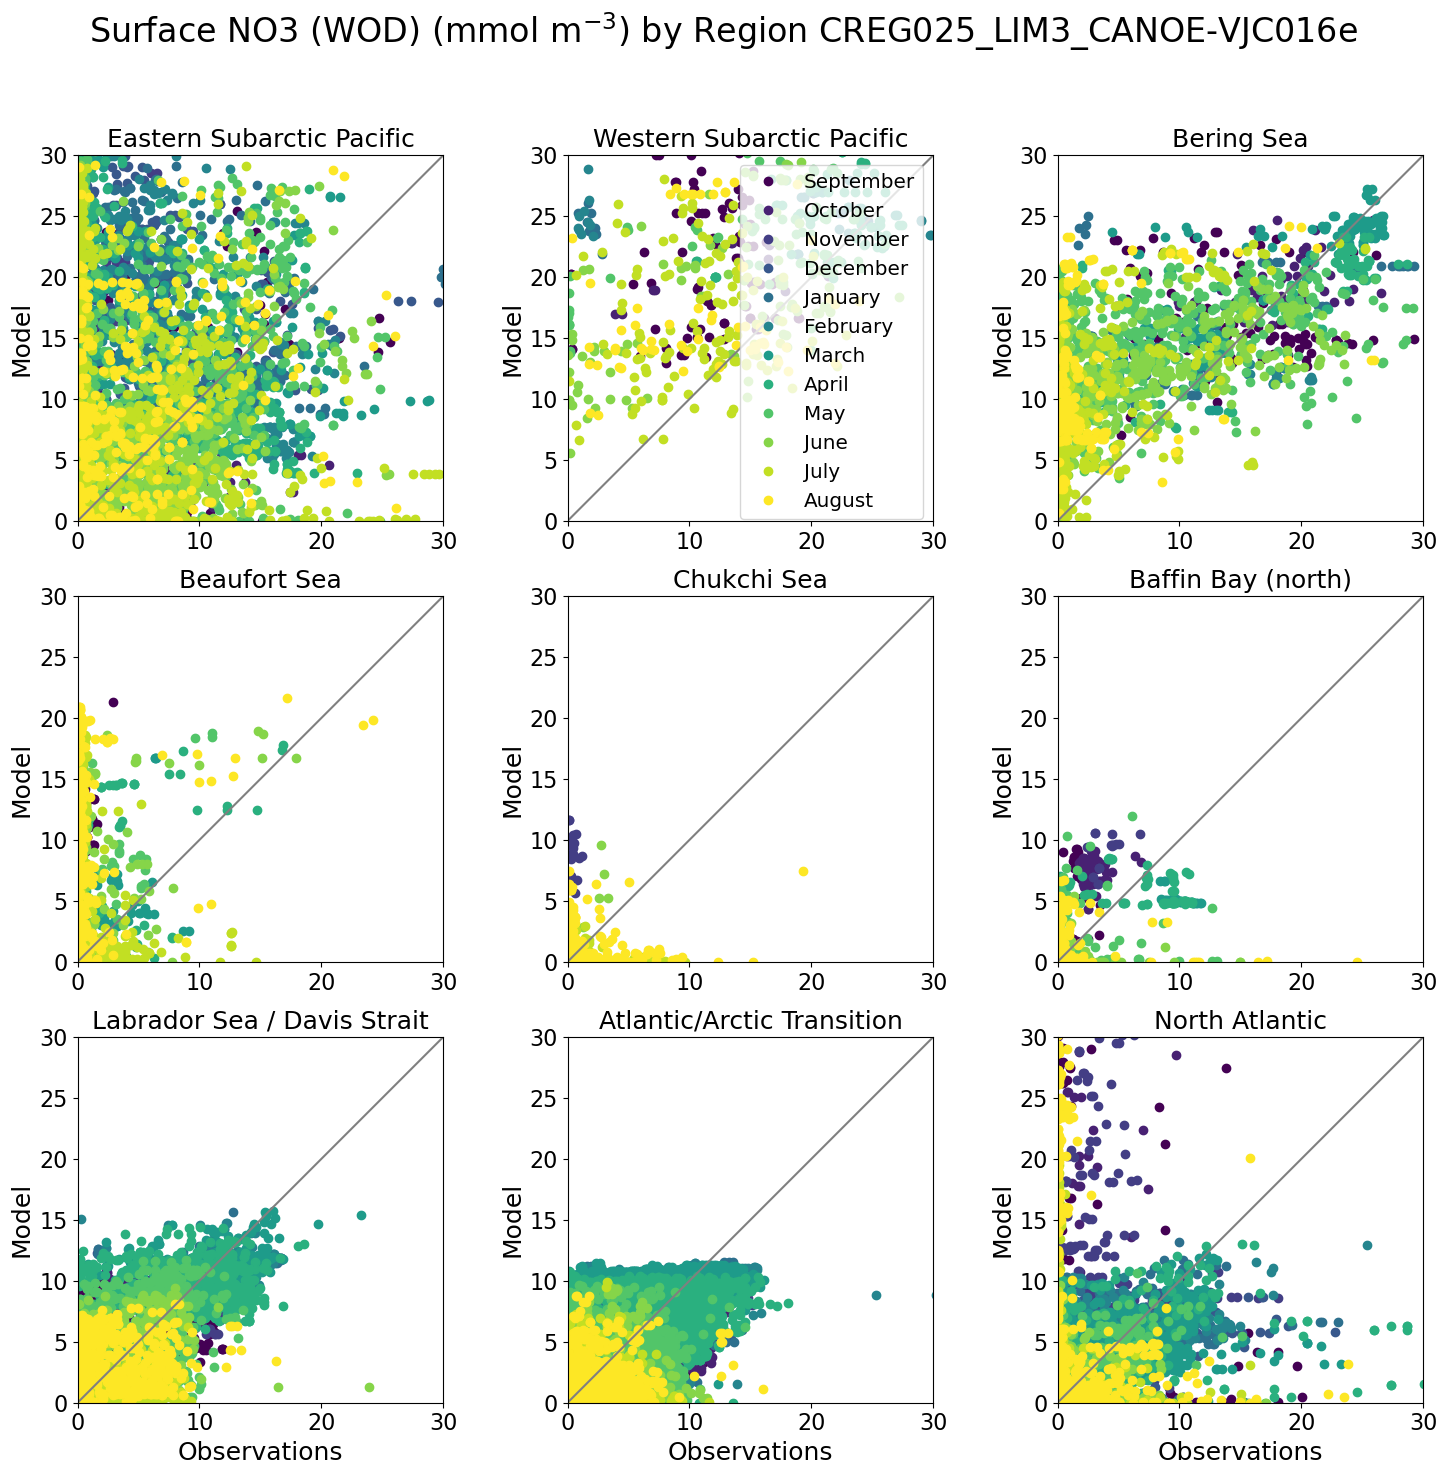

In [6]:
import itertools
fig, axes = plt.subplots(num=1, clear=True, nrows=3, ncols=3, figsize=(15, 15))
#fig.suptitle('Oxygen Concentrations: Model vs Obs, by region and month from run VJC014j', fontsize=26)

months=['September','October','November','December','January','February','March','April','May','June','July','August']
regions = ['Eastern Subarctic Pacific', 'Western Subarctic Pacific', 'Bering Sea', 'Beaufort Sea', 'Chukchi Sea', 'Baffin Bay (north)', 'Labrador Sea / Davis Strait', 'Atlantic/Arctic Transition', 'North Atlantic']
iz = np.arange(10)
#variants = ['CREG025_LIM3_CANOE-VJC014l','CREG025_LIM3_CANOE-VJC014t','CREG025_LIM3_CANOE-VJC014w',
#            'CREG025_LIM3_CANOE-VJC014x','CREG025_LIM3_CANOE-VJC014m','CREG025_LIM3_CANOE-VJC014n',
#            'CREG025_LIM3_CANOE-VJC014o','CREG025_LIM3_CANOE-VJC014p','CREG025_LIM3_CANOE-VJC014y',
#            'CREG025_LIM3_CANOE-VJC014q','CREG025_LIM3_CANOE-VJC014z','CREG025_LIM3_CANOE-VJC014r',
#            'CREG025_LIM3_CANOE-VJC014s','CREG025_LIM3_CANOE-VJC014u','CREG025_LIM3_CANOE-VJC014v',
 #           'CREG025_LIM3_CANOE-VJC015a','CREG025_LIM3_CANOE-VJC015b','CREG025_LIM3_CANOE-VJC015c',
 #           'CREG025_LIM3_CANOE-VJC015d','CREG025_LIM3_CANOE-VJC015e','CREG025_LIM3_CANOE-VJC015f',
 #           'CREG025_LIM3_CANOE-VJC015g','CREG025_LIM3_CANOE-VJC015i','CREG025_LIM3_CANOE-VJC015j',
 #           'CREG025_LIM3_CANOE-VJC015k','CREG025_LIM3_CANOE-VJC015l','CREG025_LIM3_CANOE-VJC015m',
 #           'CREG025_LIM3_CANOE-VJC015n','CREG025_LIM3_CANOE-VJC015p','CREG025_LIM3_CANOE-VJC015q',
 #           'CREG025_LIM3_CANOE-VJC015r','CREG025_LIM3_CANOE-VJC015t','CREG025_LIM3_CANOE-VJC015u',
 #           'CREG025_LIM3_CANOE-VJC015v', 'CREG025_LIM3_CANOE-VJC015w','CREG025_LIM3_CANOE-VJCnep01',
 #           'CREG025_LIM3_CANOE-VJCsed01','CREG025_LIM3_CANOE-VJCsed02','CREG025_LIM3_CANOE-VJCsed03']

variants = ['CREG025_LIM3_CANOE-VJC016c','CREG025_LIM3_CANOE-VJC016d','CREG025_LIM3_CANOE-VJC016e']


for asuff in variants:
    fig, axes = plt.subplots(num=1, clear=True, nrows=3, ncols=3, figsize=(15, 15))
    #runid='CREG025_LIM3_CANOE-VJC015'+asuff
    runid = str(asuff)
    data_all=np.zeros((12,nz,ny,nx))
    fig.suptitle('Surface NO3 (WOD) (mmol m$^{-3}$) by Region '+asuff, fontsize=24)
    flist = glob.glob("/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/"+runid+"_monthly_NO3.nc")
    flist.sort()
    ifile = 0
    for i, c, in enumerate(regions):
        cx=plt.subplot(3,3,i+1)
        colors =itertools.cycle(plt.get_cmap('viridis')(np.linspace(0,1, 12))) # potential pallettes: hsv, jet, gnuplot
        
        for im in np.arange(9,12):
            if im >= 0:
                filein = flist[ifile]
                data = Dataset(filein, "r", format="NETCDF4")
                modNO3 = data.variables['NO3'][:]
                tmaskz=tmask[iz,:,:].flatten()   
                ZZ=(np.zeros((10,ny,nx))+regindx).flatten()    # broadcast regions map into a 3D array with same data for each depth

                XOBS=obsNO3[im,iz,:,:].squeeze().flatten()
                XMOD=modNO3[im,iz,:,:].squeeze().flatten()
                ii=np.where( ~np.isnan(XOBS) )[0]
                XOBS=XOBS[ii]; XMOD=XMOD[ii]; ZZ=ZZ[ii]; tmaskz=tmaskz[ii];

                jj=np.where( (XOBS>0.) & (ZZ==(i+1)) & (tmaskz==1) )[0]
                colour = next(colors) 
                plt.plot(XOBS[jj], XMOD[jj], "o", color=colour, markeredgecolor=colour, label=im)
            if i > 5:
                plt.xlabel("Observations", fontsize=18)
            plt.ylabel("Model", fontsize=18)
            plt.title(c, fontsize=18)
            plt.axis('square')
            cx.tick_params(axis='both', labelsize=16)
            cx.set_aspect(1./cx.get_data_ratio())
        for im in np.arange(0,9):
            if im >= 0:
                filein = flist[ifile]
                print(filein)
                data = Dataset(filein, "r", format="NETCDF4")
                modNO3 = data.variables['NO3'][:]
                tmaskz=tmask[iz,:,:].flatten()   
                ZZ=(np.zeros((10,ny,nx))+regindx).flatten()    # broadcast regions map into a 3D array with same data for each depth

                XOBS=obsNO3[im,iz,:,:].squeeze().flatten()
                XMOD=modNO3[im,iz,:,:].squeeze().flatten()
                ii=np.where( ~np.isnan(XOBS) )[0]
                XOBS=XOBS[ii]; XMOD=XMOD[ii]; ZZ=ZZ[ii]; tmaskz=tmaskz[ii];

                jj=np.where( (XOBS>0.) & (ZZ==(i+1)) & (tmaskz==1) )[0]
                colour = next(colors) 
                plt.plot(XOBS[jj], XMOD[jj], "o", color=colour, markeredgecolor=colour, label=im)

            if i > 5:
                plt.xlabel("Observations", fontsize=18)

            plt.ylabel("Model", fontsize=18)
            plt.title(c, fontsize=18)
            plt.xlim([0, 30]); plt.ylim([0,30])
            cx.tick_params(axis='both', labelsize=16)
            cx.set_aspect(1./cx.get_data_ratio())
        cx.plot([0, 1], [0, 1], color='grey', transform=cx.transAxes)
        if i == 1:
            plt.legend(labels=['September','October','November','December','January','February','March','April','May','June','July','August'],
                       fontsize='x-large')
    plt.tight_layout(rect=(0,0,1,0.95), w_pad=0)
    plt.show()
    fig.savefig("/home/fid000/WORK7/ANALYSIS/model_evaluation/FIGURES/Books/NO3_WOD/NO3_WOD_"+runid)
    #plt.close(fig)    

CREG025_LIM3_CANOE-VJC014l
['/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC014l_monthly_NO3.nc']
0


/tmp/ipykernel_13509/212671665.py:51: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modNO3 = data.variables['NO3'][:]


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC014l_monthly_NO3.nc
0


/home/fid000/WORK7/software/anaconda3/envs/pypkg/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/fid000/WORK7/software/anaconda3/envs/pypkg/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC014l_monthly_NO3.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC014l_monthly_NO3.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC014l_monthly_NO3.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC014l_monthly_NO3.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC014l_monthly_NO3.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC014l_monthly_NO3.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC014l_monthly_NO3.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC014l_monthly_NO3.nc
CREG025_LIM3_CANOE-VJC014t
['/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC014t_monthly_NO3.nc']
0
/home/fid000/WORK

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC014p_monthly_NO3.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC014p_monthly_NO3.nc
CREG025_LIM3_CANOE-VJC014y
['/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC014y_monthly_NO3.nc']
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC014y_monthly_NO3.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC014y_monthly_NO3.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC014y_monthly_NO3.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC014y_monthly_NO3.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC014y_monthly_NO3.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC014y_monthly_NO3.nc
0
/home/fid000/WORK

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC015a_monthly_NO3.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC015a_monthly_NO3.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC015a_monthly_NO3.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC015a_monthly_NO3.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC015a_monthly_NO3.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC015a_monthly_NO3.nc
CREG025_LIM3_CANOE-VJC015b
['/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC015b_monthly_NO3.nc']
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC015b_monthly_NO3.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC015b_monthly_NO3.nc
0
/home/fid000/WORK

/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC015j_monthly_NO3.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC015j_monthly_NO3.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC015j_monthly_NO3.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC015j_monthly_NO3.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC015j_monthly_NO3.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC015j_monthly_NO3.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC015j_monthly_NO3.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC015j_monthly_NO3.nc
0
/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/CREG025_LIM3_CANOE-VJC015j_monthly_NO3.nc
CREG025_LIM3_CANOE-VJC015k
['/home/fid000/WORK7/

ValueError: num must be 1 <= num <= 30, not 31

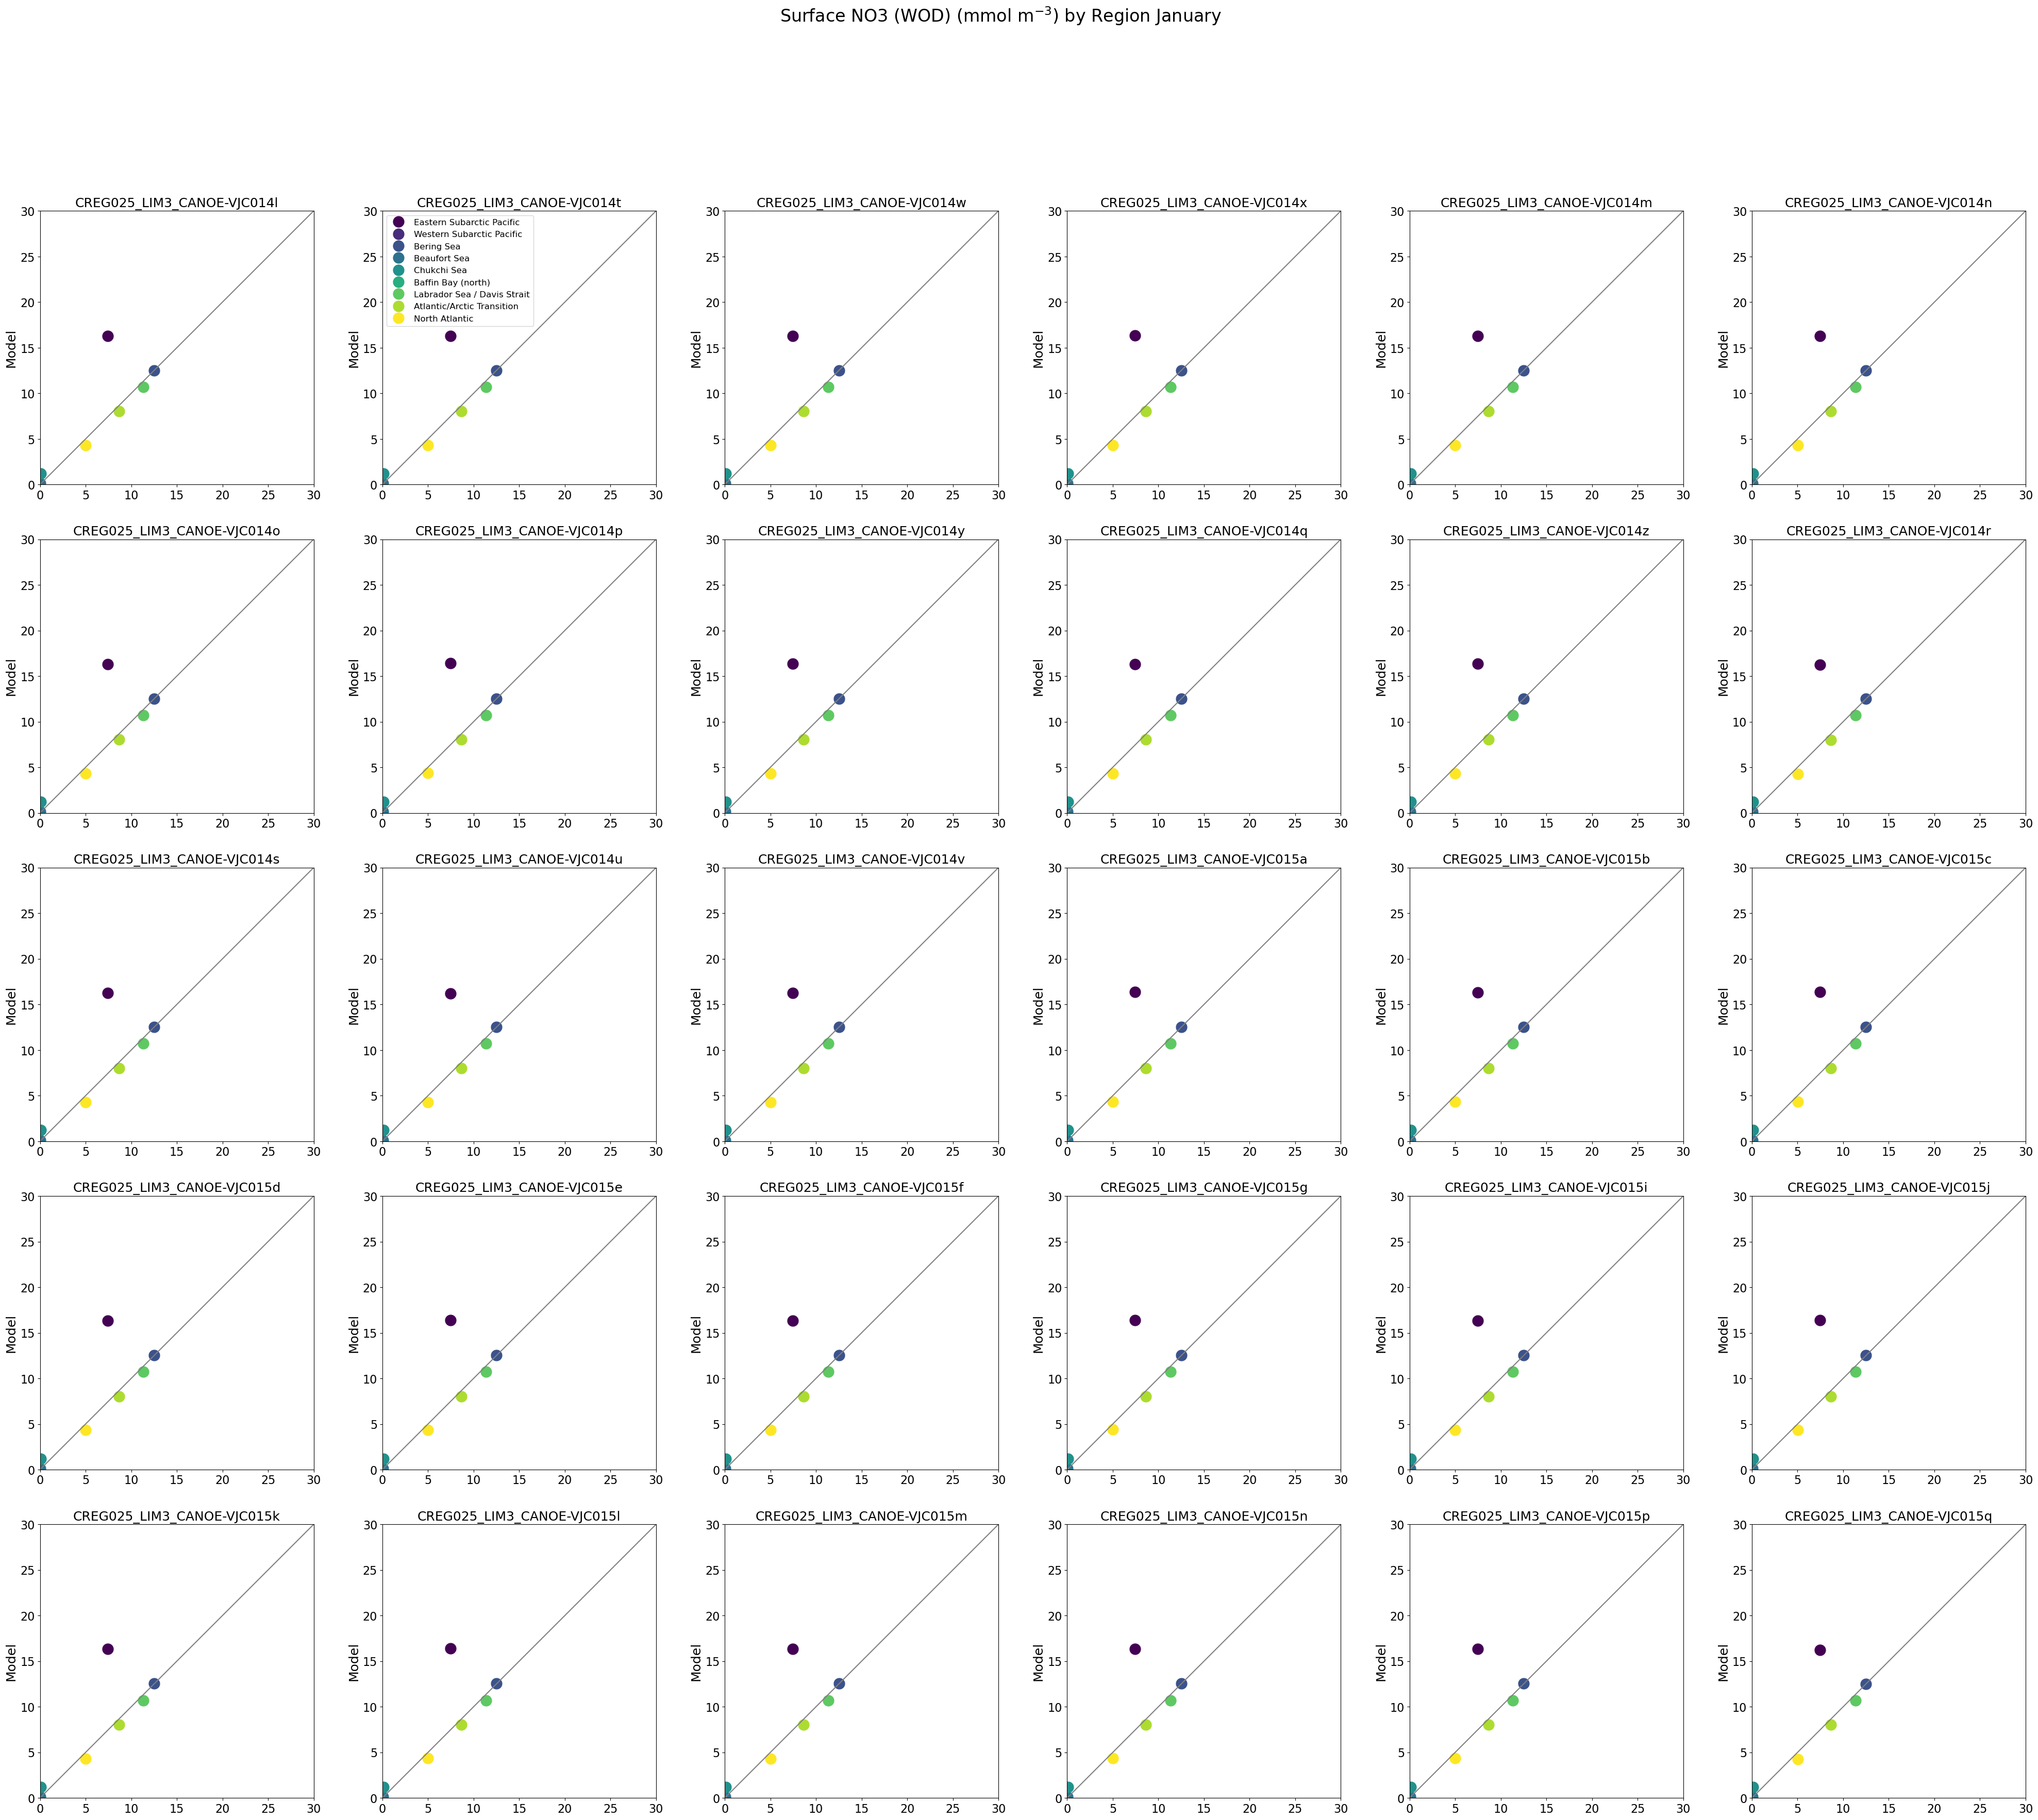

In [8]:
# July

#fig, axes = plt.subplots(num=1, clear=True, nrows=6, ncols=5, figsize=(30, 20))
regions = ['Eastern Subarctic Pacific', 'Western Subarctic Pacific', 'Bering Sea', 'Beaufort Sea', 'Chukchi Sea', 'Baffin Bay (north)', 'Labrador Sea / Davis Strait', 'Atlantic/Arctic Transition', 'North Atlantic']
import itertools
iz = np.arange(10)

months=['January','February','March','April','May','June','July','August','September','October','November','December']
regions = ['Eastern Subarctic Pacific', 'Western Subarctic Pacific', 'Bering Sea', 'Beaufort Sea', 'Chukchi Sea', 'Baffin Bay (north)', 'Labrador Sea / Davis Strait', 'Atlantic/Arctic Transition', 'North Atlantic']
variants = ['CREG025_LIM3_CANOE-VJC014l','CREG025_LIM3_CANOE-VJC014t','CREG025_LIM3_CANOE-VJC014w',
            'CREG025_LIM3_CANOE-VJC014x','CREG025_LIM3_CANOE-VJC014m','CREG025_LIM3_CANOE-VJC014n',
            'CREG025_LIM3_CANOE-VJC014o','CREG025_LIM3_CANOE-VJC014p','CREG025_LIM3_CANOE-VJC014y',
            'CREG025_LIM3_CANOE-VJC014q','CREG025_LIM3_CANOE-VJC014z','CREG025_LIM3_CANOE-VJC014r',
            'CREG025_LIM3_CANOE-VJC014s','CREG025_LIM3_CANOE-VJC014u','CREG025_LIM3_CANOE-VJC014v',
            'CREG025_LIM3_CANOE-VJC015a','CREG025_LIM3_CANOE-VJC015b','CREG025_LIM3_CANOE-VJC015c',
            'CREG025_LIM3_CANOE-VJC015d','CREG025_LIM3_CANOE-VJC015e','CREG025_LIM3_CANOE-VJC015f',
            'CREG025_LIM3_CANOE-VJC015g','CREG025_LIM3_CANOE-VJC015i','CREG025_LIM3_CANOE-VJC015j',
            'CREG025_LIM3_CANOE-VJC015k','CREG025_LIM3_CANOE-VJC015l','CREG025_LIM3_CANOE-VJC015m',
            'CREG025_LIM3_CANOE-VJC015n','CREG025_LIM3_CANOE-VJC015p','CREG025_LIM3_CANOE-VJC015q',
            'CREG025_LIM3_CANOE-VJC015r','CREG025_LIM3_CANOE-VJC015t','CREG025_LIM3_CANOE-VJC015u',
            'CREG025_LIM3_CANOE-VJC015v', 'CREG025_LIM3_CANOE-VJC015w','CREG025_LIM3_CANOE-VJCnep01',
            'CREG025_LIM3_CANOE-VJCsed01','CREG025_LIM3_CANOE-VJCsed02','CREG025_LIM3_CANOE-VJCsed03']


for im, mmon in enumerate(months):
    
    fig, axes = plt.subplots(num=1, clear=True, nrows=5, ncols=6, figsize=(50, 40))
    fig.suptitle('Surface NO3 (WOD) (mmol m$^{-3}$) by Region '+mmon, fontsize=24) 
    
    for a, asuff in enumerate(variants):
        cx=plt.subplot(5,6, a+1)
        #runid = str('CREG025_LIM3_CANOE-'+asuff)
        runid = str(asuff)
        print(runid)
        data_all=np.zeros((12,nz,ny,nx))
        flist = glob.glob("/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/NO3/"+runid+"_monthly_NO3.nc")
        flist.sort()
        print(flist)
        ifile = 0
        colors =itertools.cycle(plt.get_cmap('viridis')(np.linspace(0,1, 9))) # potential pallettes: hsv, jet, gnuplot
            
        for i, c in enumerate(regions): 
            
            if i >= 0:
                
                #ifile=ifile+1
                print(ifile)
                filein = flist[ifile]
                #print(filein)
                data = Dataset(filein, "r", format="NETCDF4")
                modNO3 = data.variables['NO3'][:]

                tmaskz=tmask[iz,:,:].flatten()
                ZZ=(np.zeros((10,ny,nx))+regindx).flatten()    # broadcast regions map into a 3D array with same data for each depth
                XOBS=obsNO3[im,iz,:,:].squeeze().flatten()
                XMOD=modNO3[im,iz,:,:].squeeze().flatten()
                ii=np.where( ~np.isnan(XOBS) )[0]
                XOBS=XOBS[ii]; XMOD=XMOD[ii]; ZZ=ZZ[ii]; tmaskz=tmaskz[ii];
                jj=np.where( (XOBS>0.) & (ZZ==(i+1)) & (tmaskz==1) )[0]                          
              
                XOBS=np.mean(XOBS[jj]); XMOD=np.mean(XMOD[jj])
                
                colour = next(colors) 
                plt.plot(XOBS, XMOD, "o", color=colour, markeredgecolor=colour, markersize=15, label=regions)
                print(filein)

            #if i > 5:
            #    plt.xlabel("Observations", fontsize=18)
            plt.ylabel("Model", fontsize=18)
            plt.title(asuff, fontsize=18)
            plt.xlim([0, 30]); plt.ylim([0,30])
            cx.tick_params(axis='both', labelsize=16)
            cx.set_aspect(1./cx.get_data_ratio())
            if a ==1:
                plt.legend(labels=['Eastern Subarctic Pacific', 'Western Subarctic Pacific', 'Bering Sea', 'Beaufort Sea', 'Chukchi Sea', 'Baffin Bay (north)', 'Labrador Sea / Davis Strait', 'Atlantic/Arctic Transition', 'North Atlantic'],
                           fontsize='large')
        cx.plot([0, 1], [0, 1], color='grey', transform=cx.transAxes)
        
            
    plt.tight_layout(rect=(0,0,1,0.95), w_pad=0)
    plt.show()
    fig.savefig("/home/fid000/WORK7/ANALYSIS/model_evaluation/FIGURES/Means/NO3_WOD/NO3_WOD_month"+str("{:02d}".format(im+1)))